# Tarea 1 - Fisica Computacional
#### Estudiante: Ignacio Vargas Cordero

### Ejercicio 1  
Realice un notebook en el se programen y expliquen los siguientes algoritmos de integracion de ecuaciones diferenciales:

1. Integracion con metodo de Euler
2. Integracion sobre serie de Taylor a 2 orden
3. Integracion con metodo de Runge-Kutta de 2 orden
4. Integracion con metodo de Runge-Kutta de 4 orden

Verifique el funcionamiento de sus integradores encontrando la solucion de la siguiente ecuacion diferencial para $y(t)$:

$\ddot{x} + 0.5\dot{x} + \sin{x} = e^{-t} \sin(3t)$

con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$

In [1]:
from pylab import *
%matplotlib inline

A continuacion, vuelvo a definir funciones muy parecidas (o identicas) a las programadas en clase. He intentado ser expresivo con mis nombres de variable para facilitar la legibilidad y comprension.

#### Integracion con metodo de Euler

$$ y_{n+1}=y_n+f(t_n,y_n)h$$ 
con $h=t_{n+1}-t_n$

In [2]:
def euler(ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(solucion)-1):
        solucion[i+1] = solucion[i]+h*ecuacion(solucion[i], tiempos[i])
    return tiempos, solucion

#### Integracion sobre serie de Taylor a 2 orden
$$ y(x_0+h) = y_0 + hy'(x_0) +\frac{h^2}{2} y''(x_0) + O(h^3)$$ 
con $O(x_0)$ términos de orden superior.

In [3]:
def taylor2(ecuacion, d_ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        f = ecuacion(solucion[i,:], tiempos[i])
        df, jacobiano = d_ecuacion(solucion[i,:], tiempos[i])
        solucion[i+1,:] = solucion[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, solucion

#### Integracion con metodo de Runge-Kutta de 2 orden
$$y(x_{n+1}) = y(x_n) +\frac{h}{2}\left(f(x_n,y_n)+f(x_{n+1},y_{n+1})\right)$$

In [4]:
def rk2(ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k = h*ecuacion(solucion[i,:], tiempos[i])
        f = ecuacion(solucion[i,:]+0.5*k, tiempos[i]+0.5*h)
        solucion[i+1,:] = solucion[i,:]+h*f
    return tiempos, solucion

#### Integracion con metodo de Runge-Kutta de 4 orden

$y_{n+1} = y_n +\frac{h}{6}(k_1+2k_2+2k_3+k_4)$

$k_1=f(x_n,y_n)$

$k_2= f(x_n+\frac{h}{2},y_n+\frac{h}{2}k_1)$

$k_3 = f(x_n +\frac{h}{2},y_n + \frac{h}{2}k_2)$

$k_4 = f(x_n +h,y_n + hk_3)$

In [5]:
def rk4(ecuacion, punto_inicial, x, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k1 = ecuacion(solucion[i,:], tiempos[i])
        k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h)
        k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h)
        k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h)
        solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos, solucion

#### Plot de Integraciones

Defino una funcion llamada 'integrador_surtido', cuyo proposito es unir a mis integradores previos en una sola funcion que los manda a llamar a todos a la vez, para propositos de comparacion - inclusive graficandolos.

In [6]:
def integrador_surtido(ecuacion, d_ecuacion, punto_inicial, x, h, timeplot=1, phaseplot=1):
    #recopilo las variables que regresan los integradores dentro de variables locales
    tiempos_euler, solucion_euler = euler(ecuacion, punto_inicial, x, h)
    tiempos_taylor2, solucion_taylor2 = taylor2(ecuacion, d_ecuacion, punto_inicial, x, h)
    tiempos_rk2, solucion_rk2 = rk2(ecuacion, punto_inicial, x, h)
    tiempos_rk4, solucion_rk4 = rk4(ecuacion, punto_inicial, x, h)
    #Si se le pasa el argumento timeplot, se grafica contra el tiempo
    if timeplot == 1:
        fig1 = figure()
        ax = fig1.add_subplot(111)
        ax.plot(tiempos_euler, solucion_euler[:,0], label="Euler")
        ax.plot(tiempos_taylor2, solucion_taylor2[:,0], label="Taylor2")
        ax.plot(tiempos_rk2, solucion_rk2[:,0], label="RK2")
        ax.plot(tiempos_rk4, solucion_rk4[:,0], label="RK4")
        ax.set_xlabel("$t$")
        ax.set_ylabel("$x(t)$")
        ax.set_title(u"Métodos en el tiempo, h="+str(h))
        ax.legend(loc='best')
        ax.grid(True)
    # Si se le pasa el argumento phaseplot, se grafica el espacio fase    
    if phaseplot == 1:
        fig2 = figure()
        bx = fig2.add_subplot(111)
        bx.plot(solucion_euler[:,0], solucion_euler[:,1], label="Euler")
        bx.plot(solucion_taylor2[:,0], solucion_taylor2[:,1], label="Taylor2")
        bx.plot(solucion_rk2[:,0], solucion_rk2[:,1], label="RK2")
        bx.plot(solucion_rk4[:,0], solucion_rk4[:,1], label="RK4")
        bx.set_xlabel("$x(t)$")
        bx.set_ylabel("$\dot x(t)$")
        bx.set_title(u"Métodos en el espacio fase, h="+str(h))
        bx.legend(loc='best')
        bx.grid(True)

#### Ecuacion Diferencial: $\ddot{x} + 0.5\dot{x} + \sin{x} = e^{-t} \sin(3t)$, $x(0) = 0$, $\dot{x}(0) = 1$

Al ser una ecuacion diferencial de segundo orden, es necesario reducirla de orden a traves de sustitucion de variable, convirtiendo al problema en un sistema de ecuaciones.

In [7]:
#y = (y1, y2)
def ecuacion1(y, t):
    y1_prima = y[1]
    y2_prima = -0.5*y[1] - sin(y[0]) + exp(-t)*sin(3*t)
    return array ([y1_prima, y2_prima])

def d_ecuacion1(y, t):
    return array ([0, (3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1],[-cos(y[0]),-0.5]])

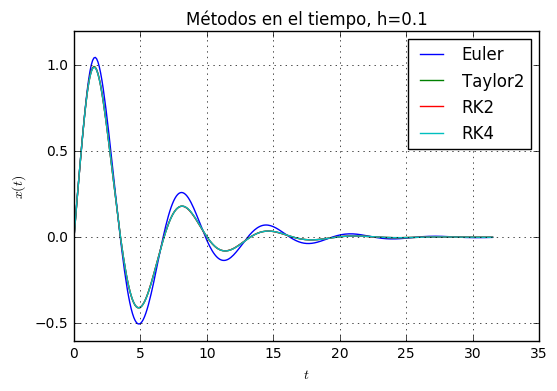

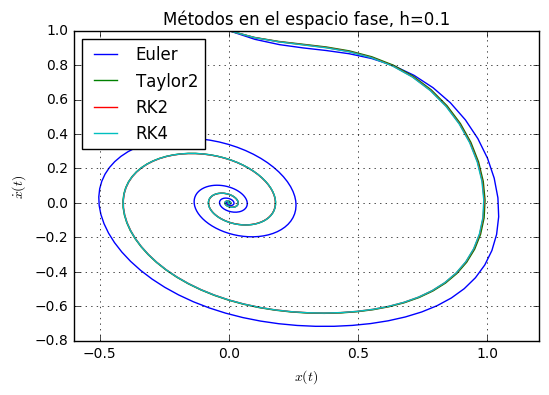

In [8]:
integrador_surtido(ecuacion1, d_ecuacion1, array([0.0, 1.0]), [0, 10*pi], 0.1)

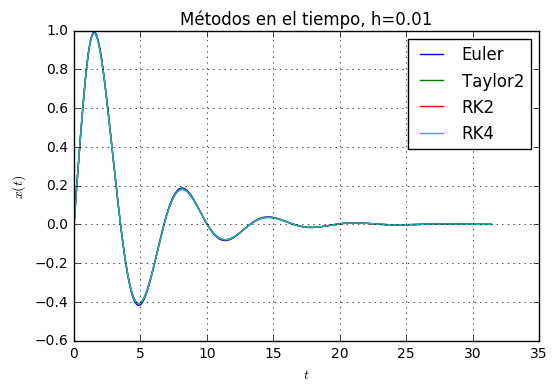

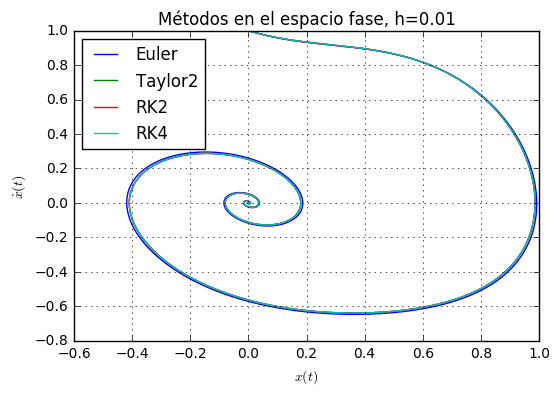

In [30]:
integrador_surtido(ecuacion1, d_ecuacion1, array([0.0, 1.0]), [0, 10*pi], 0.01)

### Ejercicio 2  
Utilizando los integradores anteriores encuentre el mejor paso de integracion para la siguiente ecuacion:

$\dddot{y} + \ddot{y}^2 - 3\dot{y}^3 + \cos^2{y} = e^{-t} \sin(3t)$

con condiciones iniciales $\ddot{y}(1) = 1, \dot{y}(1) = 2, y(1) = 1$. En particular que sucede en el intervalo $t \in [1,2]$ y $t \in [1,2.1]$.

De manera similar al problema anterior, reducimos la ecuacion diferencial de ordenes superiores a un problema de sistema de ecuaciones de primer orden.

In [10]:
#y = (y1, y2, y3)
def ecuacion2(y, t):
    y1_prima = y[1]
    y2_prima = y[2]
    y3_prima = exp(-t)*sin(3*t) - y[2]*y[2] + 3*y[1]*y[1]*y[1]+cos(y[0])*cos(y[0])
    return array ([y1_prima, y2_prima, y3_prima])

def d_ecuacion2(y, t):
    return array([0,0,(3*cos(3*t)-sin(3*t))*exp(-t)]), array([[0,1,0], [0,0,1], [sin(2*y[0]),9*y[1]*y[1],-2*y[2]]])

Como ya tengo mi funcion 'integrador surtido', nada mas la aplico sobre la ecuacion dada, y observo los resultados

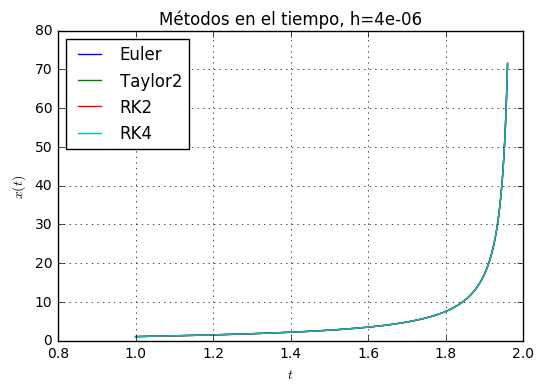

In [11]:
integrador_surtido(ecuacion2, d_ecuacion2, array([1.0,2.0,1.0]), [1.,1.96], 4e-6, 1, 0)

/home/ignacio/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in double_scalars
/home/ignacio/.local/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in cos
/home/ignacio/.local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in double_scalars
/home/ignacio/.local/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in add


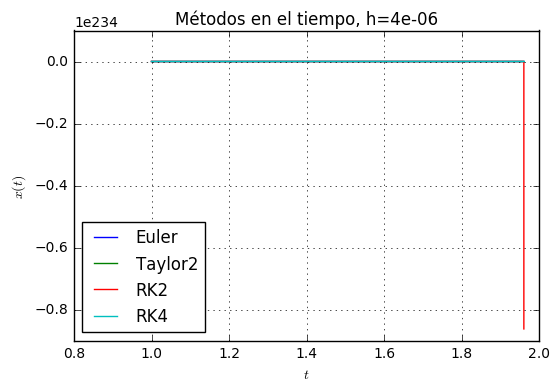

In [31]:
integrador_surtido(ecuacion2, d_ecuacion2, array([1.0,2.0,1.0]), [1.,2.1], 4e-6, 1, 0)

Evidentemente, en la region vecina a $t=2$ existe una divergencia. De los pasos que tuve mas exitosos, destaco el mostrado en la primera grafica (la cual contiene los cuatro metodos de integracion) $h = 4e^{-6}$

### Ejercicio 3  
Modifique las funciones integradoras en el problema 1 de tal manera que se puedan pasar argumentos opcionales al sistema de ecuaciones diferenciales de tal manera que se puedan modificar parametros al momento de hacer la integracion. Una vez hecho esto, obtenga la solucion de la siguiente ecucacion diferencial

$\ddot{x} + \frac{1}{10}\dot{x} + 4\sin{x} = \frac{1}{2}\sin(\omega t)$

Con condiciones iniciales $\dot{x}(0) = 1$ y $x(0) = 0$ y para $\omega = \{1,1.1,1.2,1.3,...,2.9,3\}$. Realice la grafica de algunas soluciones que representen el comportamiento de la solucion en funcion de $\omega$ y explique su resultado.


Defino nuevas funciones muy similares a las previas, agregando el argumento.

In [13]:
def euler_args(ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(solucion)-1):
        solucion[i+1] = solucion[i]+h*ecuacion(solucion[i], tiempos[i], argumentos)
    return tiempos, solucion

def taylor2_args(ecuacion, d_ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        f = ecuacion(solucion[i,:], tiempos[i], argumentos)
        df, jacobiano = d_ecuacion(solucion[i,:], tiempos[i], argumentos)
        solucion[i+1,:] = solucion[i,:]+h*f+(0.5*h*h*(df+dot(jacobiano, f)))
    return tiempos, solucion

def rk2_args(ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k = h*ecuacion(solucion[i,:], tiempos[i], argumentos)
        f = ecuacion(solucion[i,:]+0.5*k, tiempos[i]+0.5*h, argumentos)
        solucion[i+1,:] = solucion[i,:]+h*f
    return tiempos, solucion

def rk4_args(ecuacion, punto_inicial, x, argumentos, h=0.1):
    tiempos = arange(x[0], x[1]+h, h)
    solucion = zeros((len(tiempos), len(punto_inicial)))
    solucion[0,:] = punto_inicial
    for i in xrange(len(tiempos)-1):
        k1 = ecuacion(solucion[i,:], tiempos[i], argumentos)
        k2 = ecuacion(solucion[i,:]+0.5*h*k1, tiempos[i]+0.5*h, argumentos)
        k3 = ecuacion(solucion[i,:]+0.5*h*k2, tiempos[i]+0.5*h, argumentos)
        k4 = ecuacion(solucion[i,:]+h*k3, tiempos[i]+h, argumentos)
        solucion[i+1,:] = solucion[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempos, solucion

Diseno una rudimentaria funcion que, de nuevo, recopila los resultados de los integradores con argumentos - para poder ser utilizados en graficas o para desplegar datos.

In [14]:
def integrador_argumentos(ecuacion, d_ecuacion, punto_inicial, algoritmo, h=0.1, \
                          Tmax=80, w=arange(1,3.1,0.1)):
    #Inicializo variables que utilizare
    t_soluciones = []
    soluciones = []
    x = [0, Tmax]
    #Establezco casos para los algoritmos
    for i in w:
        if algoritmo == "Euler":
            t, sol = euler_args(ecuacion, punto_inicial, x, i, h)
        if algoritmo == "Taylor2":
            t, sol = taylor2_args(ecuacion, d_ecuacion, punto_inicial, x, i, h)
        if algoritmo == "RK2":
            t, sol = rk2_args(ecuacion, punto_inicial, x, i, h)
        if algoritmo == "RK4":
            t, sol = rk4_args(ecuacion, punto_inicial, x, i, h)
        #Voy agregando las soluciones para cada paso del for.
        t_soluciones.append(t)
        soluciones.append(sol)  
    return t_soluciones, soluciones

El companero de la funcion recopiladora de integradores con argumentos. Se encarga de graficar lo que la otra funcion le ha proporcionado.

In [15]:
def graficador_argumentos(ecuacion, d_ecuacion, punto_inicial, algoritmo, graph, ax, \
                          h=0.1, Tmax=80, w=arange(1,3.1,0.1), legd=[0,"",'r','.']):
    #Inicializamos el contenedor de la amplitud, y las variables locales para soluciones \
    #de funciones integradoras.
    amplitud = []
    t_soluciones, soluciones = integrador_argumentos(ecuacion, d_ecuacion, punto_inicial, \
                               algoritmo, h, Tmax, w)
    for i in range(len(w)):
        if graph==1:
            ax.plot(t_soluciones[i], soluciones[i][:,0], label="$\omega =$"+str(w[i]))
        else:
            amplitud.append([soluciones[i][j,0]*soluciones[i][j,0] for j in range(len(soluciones[i][:,0]))])

    if graph!=1:
        norma = zeros(len(w))
        for i in range(len(w)):
            for j in range(len(amplitud[i])):
                norma[i] += amplitud[i][j]
            norma[i] = norma[i]*h 
    #Si le damos argumento 1 a graph, nos da la grafica de soluciones para omegas
    if graph==1:
        ax.set_xlabel("$t$",  fontsize = 16)
        ax.set_ylabel("$x(t)$",  fontsize = 16)
        ax.set_title(u"Soluciones para distintos valores de $\omega$ con el método de "+algoritmo, fontsize = 16)
        ax.legend(loc='best')
        ax.grid(True)    
    #Si no le damos este argumento, nos da la grafica de $\L^2$ en funcion de omegas
    else:
        ax.plot(w, norma, color=legd[2], marker=legd[3], label=legd[1])
        ax.plot(w, norma,  legd[2])
        ax.set_xlabel("$\omega$",  fontsize = 16)
        ax.set_ylabel("$\int_{0}^{"+str(Tmax)+"}|x(t)|^2 dt$",  fontsize = 12)
        ax.set_title(u"Norma $\L^2$ de la solución en función de $\omega$ con el método de "+algoritmo, fontsize = 16)
        ax.set_xticks(arange(1.0, 3.1, 0.2))
        ax.grid(True)
    #Argumento opcional para desplegar la leyenda
    if legd[0]==1:
        ax.legend()

Una vez mas, el problema 3 lo reducimos a un sistema de dos ecuaciones diferenciales de primer orden.

In [35]:
def ecuacion3(y, t, w):
    y1_prima = y[1]
    y2_prima = -0.1*y[1] - 4.0*sin(y[0]) + 0.5*sin(w*t)
    return array([y1_prima, y2_prima])

def d_ecuacion3(y, t, w):
    return array([0, 0.5*w*cos(w*t)]), array([[0,1],[-4*cos(y[0]),-0.1]])

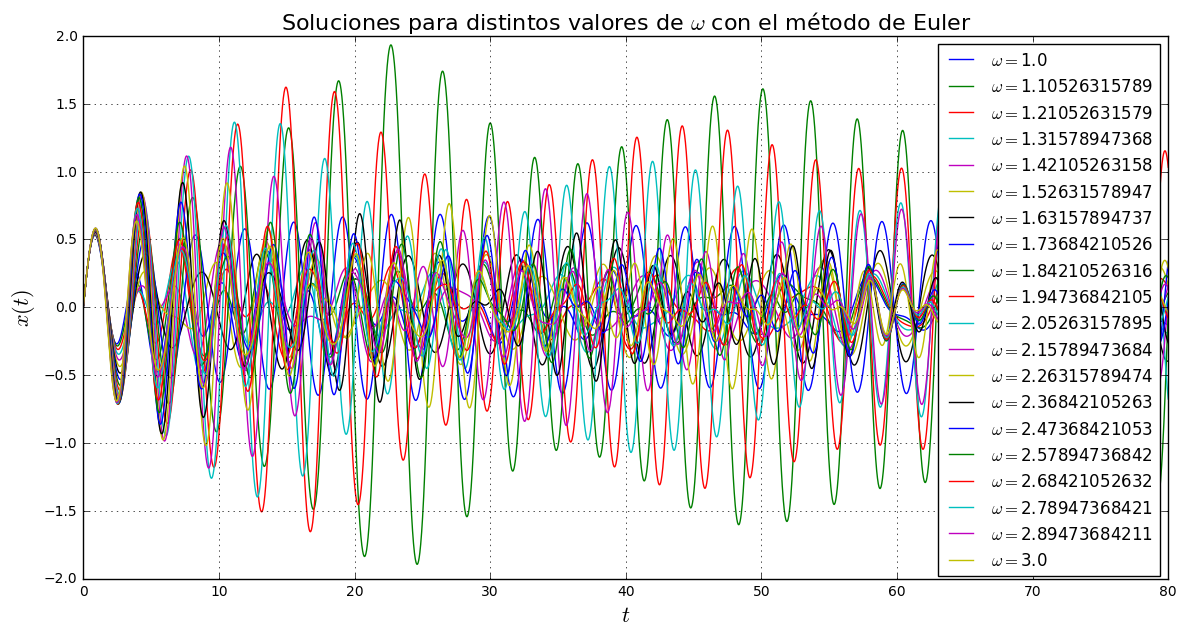

In [17]:
#Valiendonos de la funcion graficadora, le suministramos una omega distinta y un numero de
#soluciones customizable
N=20
omega=[1.0 + (2.0)*i/(N-1) for i in range(N)]
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)

graficador_argumentos(ecuacion3, d_ecuacion3, array([0.0, 1.0]), "Euler", 1, ax, 0.01, 80, omega)

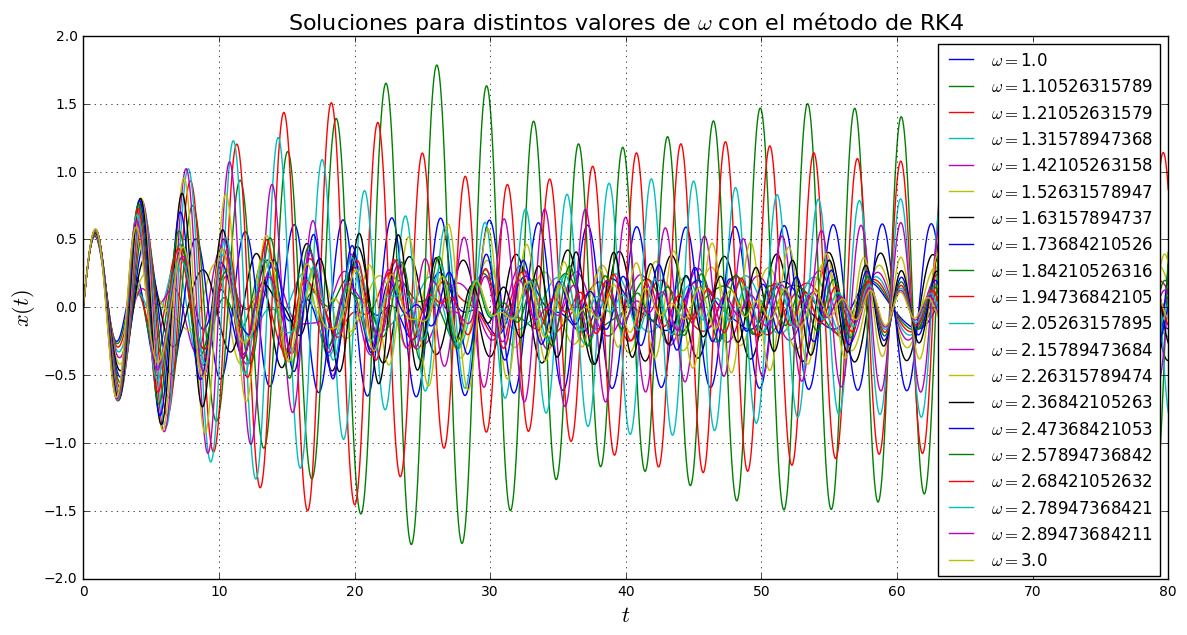

In [18]:
N=20
graficador_argumentos(ecuacion3, d_ecuacion3, array([0.0, 1.0]), "RK4", 1, ax, 0.01, 80, omega)

Solamente hay una diferencia notable entre las soluciones obtenidas por Euler y el resto de los metodos. Los metodos restantes son bastante parecidos entre si para este problema.

Norma al cuadrado de la solución en $L^2$, $\textit{i.e.}$ $\|f(x)\|^2_{L^2} = \int_0^{T_{max}} f(x)^2 dx$.

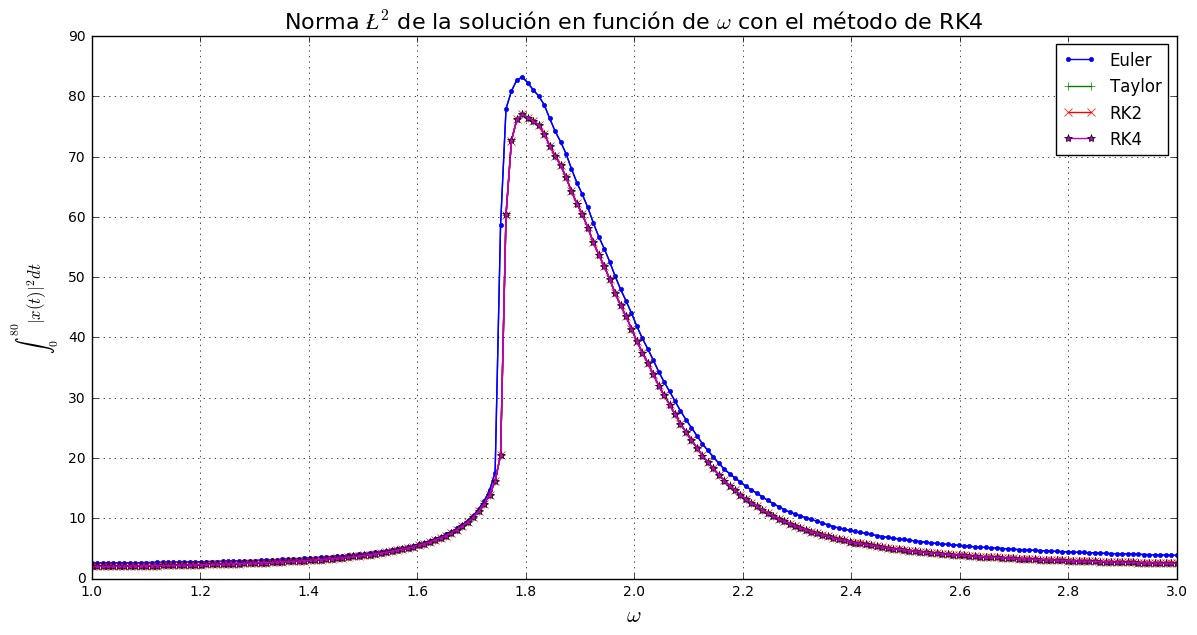

In [19]:
N=200
graficador_argumentos(ecuacion3, d_ecuacion3, array([0.0, 1.0]), "Euler", 0, ax, 0.01, \
                      80, omega, [1,"Euler",'b','.'])
graficador_argumentos(ecuacion3, d_ecuacion3, array([0.0, 1.0]), "Taylor2", 0, ax, 0.01, \
                      80, omega, [1,"Taylor",'g','+'])
graficador_argumentos(ecuacion3, d_ecuacion3, array([0.0, 1.0]), "RK2", 0, ax, 0.01, \
                      80, omega, [1,"RK2",'r','x'])
graficador_argumentos(ecuacion3, d_ecuacion3, array([0.0, 1.0]), "RK4", 0, ax, 0.01, \
                      80, omega, [1,"RK4",'m','*'])

Se exhibe un fenomeno de resonancia en la solucion de la ecuacion, cuando $\omega \approx 1.8$

### Ejercicio 4  
Considere el siguiente sistema de ecuaciones diferenciales

$$\frac{dx}{dt} = 10(y-x)\\
\frac{dy}{dt} = x(28-z)-y\\
\frac{dx}{dt} = xy - \frac{8}{3}z$$

Realice una integracion numerica del sistema de ecuaciones con alguno de los integradores del problema (el que mas le guste) y realice los siguientes ejercicios:

1. Elja una condicion inicial aleatoria en el $x,y,z \in [-5,5]$ y realice la grafica de la solucion en el plano $xy, xz, yz$ y comente sobre sus observaciones.

2. Ahora tome 3 soluciones parecidas. Para ello proponga 3 condiciones iniciales tales que en la coordenada en $y$ las condiciones iniciales difieran entr esi en $10^{-2}$. Explique lo que observa.  
Nota: De preferencia realice las integraciones con tiempos relativamente largos en los que pueda apreciar diferencias en el comportamiento de las soluciones.

In [23]:
def ecuacion4(x, t):
    x_prima = 10*(x[1]-x[0])
    y_prima = x[0]*(28-x[2])-x[1]
    z_prima = x[0]*x[1]-8.0*x[2]/3.0
    return array([x_prima, y_prima, z_prima])

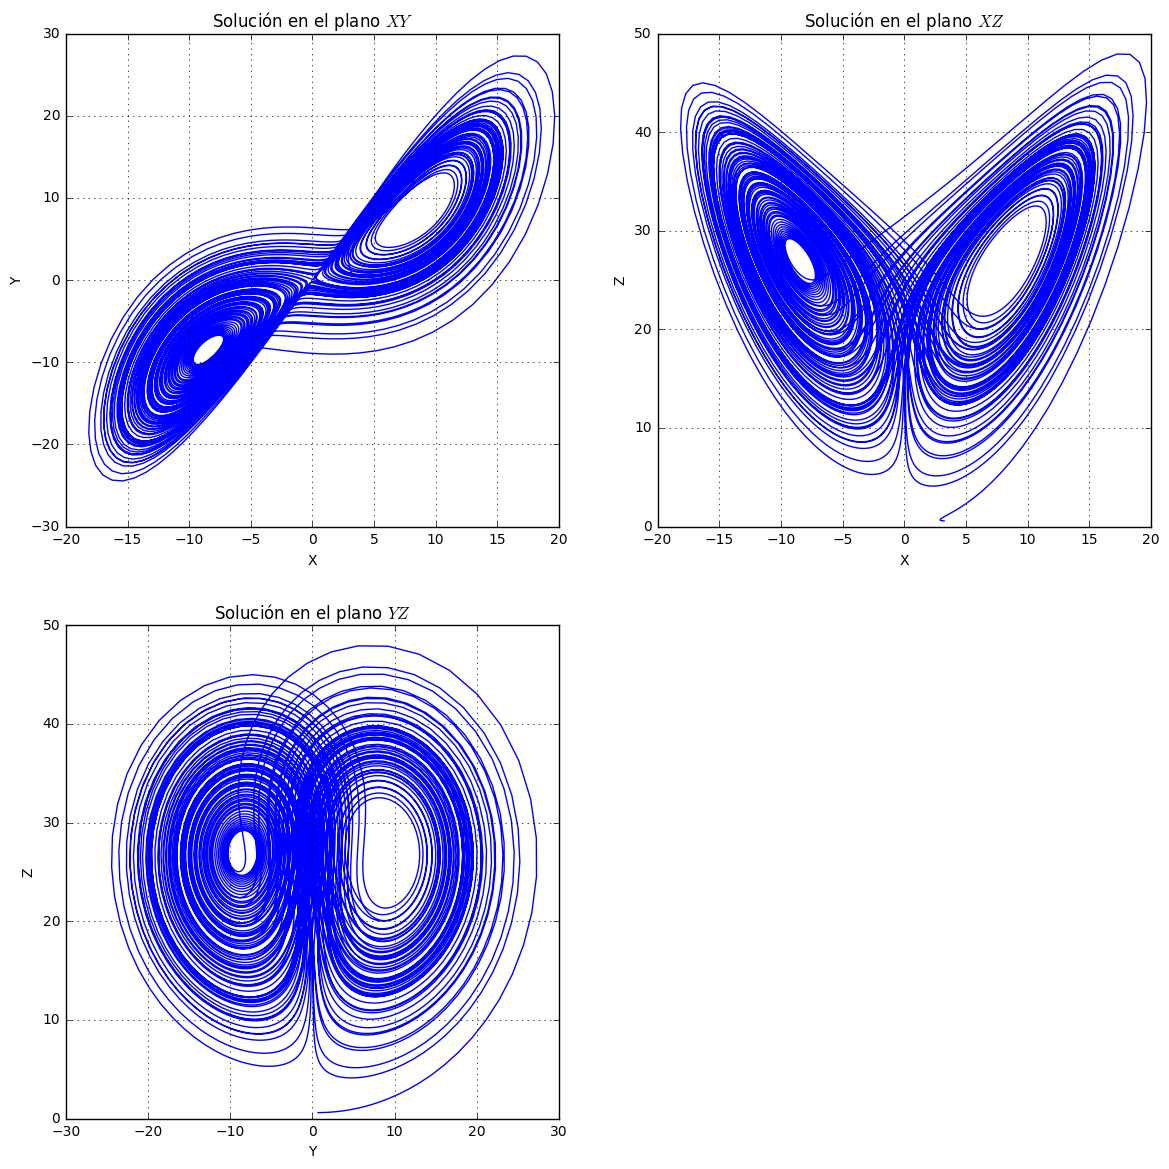

In [40]:
#Condicion inicial aleatoria para x, y, z en [-5,5]
x0 = (rand()-0.5)*10
y0 = (rand()-0.5)*10
z0 = (rand()-0.5)*10

#Solucion para t en [0,100]
t_rk4, sol_rk4 = rk4(ecuacion4, array([x0, y0, z0]), [0, 100], 0.01)
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)

# Se crean las graficas en los planos XY, XZ y YZ
ax.plot(sol_rk4[:,0], sol_rk4[:,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title(u"Solución en el plano $XY$")
ax.grid(True)

bx.plot(sol_rk4[:,0], sol_rk4[:,2])
bx.set_xlabel("X")
bx.set_ylabel("Z")
bx.set_title(u"Solución en el plano $XZ$")
bx.grid(True)

cx.plot(sol_rk4[:,1], sol_rk4[:,2])
cx.set_xlabel("Y")
cx.set_ylabel("Z")
cx.set_title(u"Solución en el plano $YZ$")
cx.grid(True)

Este sistema de ecuaciones diferenciales es conocido como "Atractor de Lorenz". Las soluciones oscilan alrededor de dos puntos, y gracias a las graficas lo podemos apreciar desde diferentes cortes. A continuacion, escogiendo 3 soluciones parecidas, es nuestro objetivo ver cuanto se separan

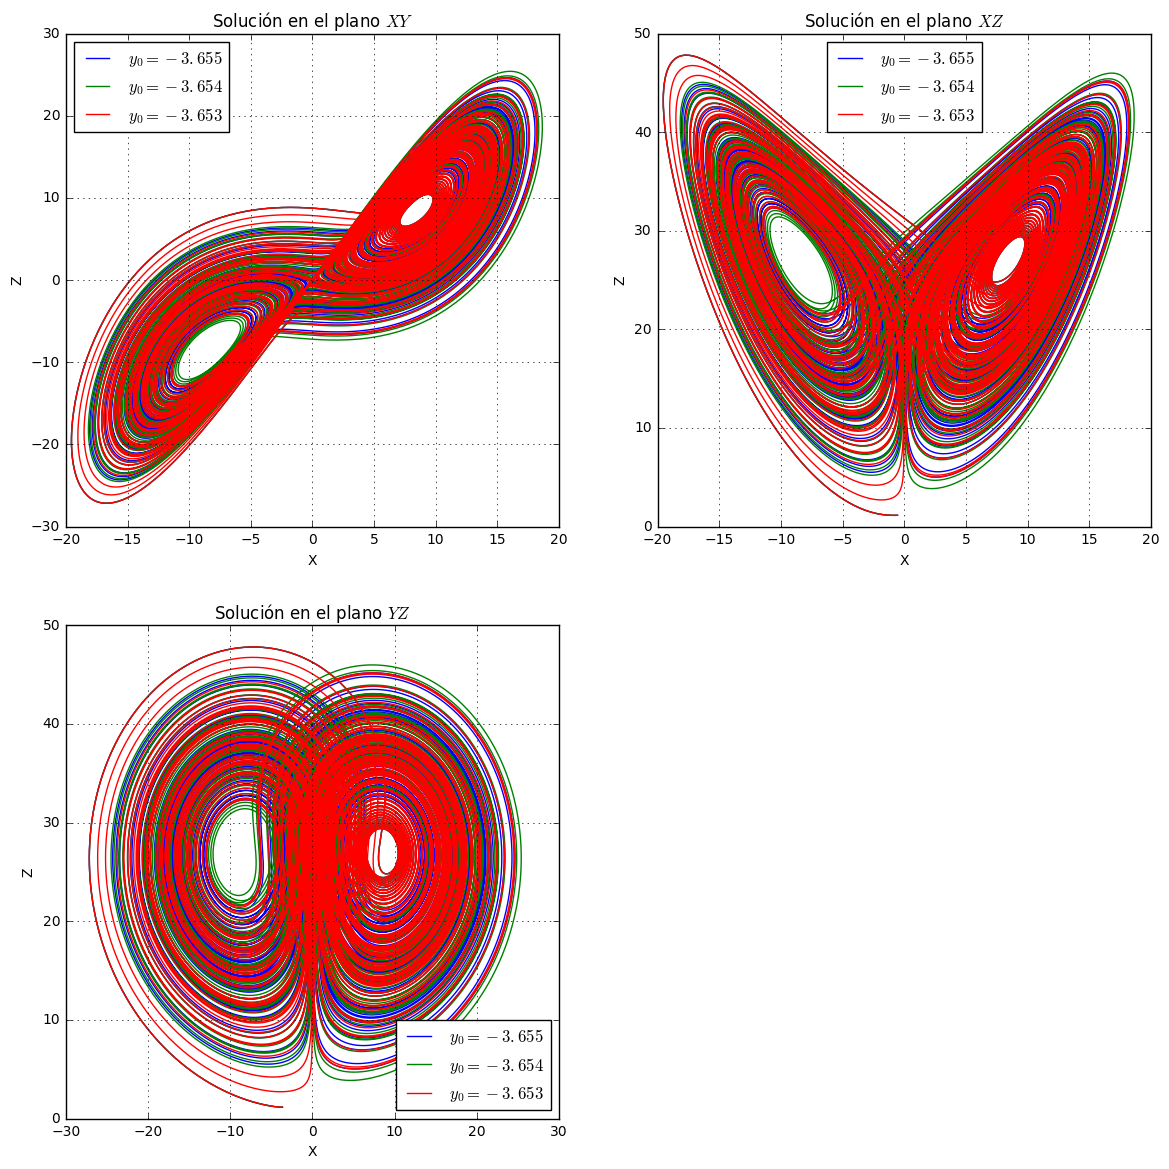

In [43]:
ax = fig.add_subplot(221)
bx = fig.add_subplot(222)
cx = fig.add_subplot(223)

x0 = (rand()-0.5)*10
y0 = (rand()-0.5)*10
z0 = (rand()-0.5)*10

#3 soluciones parecidas, forma y-0.001, y, y+0.001
for i in arange(-1.1,1.1,1):
    t_rk4, sol_rk4 = rk4(ecuacion4, array([x0, y0+0.001*i, z0]), [0, 100], 1.0e-3)
    ax.plot(sol_rk4[:,0], sol_rk4[:,1], label="$y_0="+str(round((y0+0.001*i)*1e3)/1e3)+"$")
    bx.plot(sol_rk4[:,0], sol_rk4[:,2], label="$y_0="+str(round((y0+0.001*i)*1e3)/1e3)+"$")
    cx.plot(sol_rk4[:,1], sol_rk4[:,2], label="$y_0="+str(round((y0+0.001*i)*1e3)/1e3)+"$")
    
    ax.legend(loc='best')
    bx.legend(loc='best')
    cx.legend(loc='best')
    
ax.grid(True)
ax.set_xlabel("X")
ax.set_ylabel("Z")
ax.set_title(u"Solución en el plano $XY$")

bx.grid(True)
bx.set_xlabel("X")
bx.set_ylabel("Z")
bx.set_title(u"Solución en el plano $XZ$")

cx.grid(True)
cx.set_xlabel("X")
cx.set_ylabel("Z")
cx.set_title(u"Solución en el plano $YZ$")
show()

Este es un sistema caotico. Con un ligero cambio en nuestras condiciones ideales, tenemos extremadamente distintos resultados en el resto del desarrollo.